In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as la

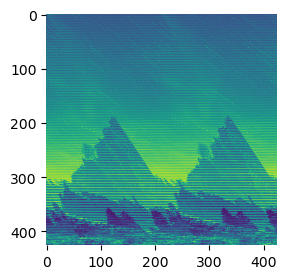

In [2]:
imagem = plt.imread("your_file.jpeg")
plt.figure(figsize = (10,3))
plt.imshow(imagem)
plt.box(False)

In [3]:
np.save("i", imagem)        
# np.load('i.npy')

In [4]:
# print(imagem)       # not 2D does't work     i = pd.DataFrame(imagem)    ___   i.to_csv("i.csv")  
imagem.shape          # use instead:           np.save("i", imagem)        ___   np.load('i.npy')

(426, 426)

In [5]:
i = pd.DataFrame(imagem)    
i.to_csv("i.csv")                # then *.xlsx

#### **Algebra_Matricial**

In [6]:
L = np.array([[1,2,3], [4,5,6], [7,8,9]])         # L = np.arange(9).reshape((3,3))

In [7]:
Li = np.invert(L)       # Li

In [8]:
Lt = np.transpose(L)    # Lt

In [9]:
identity_matrix = np.eye(3)    # print(identity_matrix)

In [10]:
M = np.array([[7,8,9], [4,5,6], [1,2,3]])         # L = np.arange(9).reshape((3,3))

In [11]:
# np.matmul(L, M)

In [12]:
# np.matmul(L, Lt)

**Simetric matrix**

In [13]:
n = 3
N = np.random.randint(low=1, high=10, size=(n,n))
Nt = N.transpose()
B = (N + Nt)/2
print("N: \n", N)
print("B: \n", B)

N: 
 [[1 2 4]
 [8 2 2]
 [3 4 8]]
B: 
 [[1.  5.  3.5]
 [5.  2.  3. ]
 [3.5 3.  8. ]]


## **Determinant, ... should be zero ...**

In [14]:
np.linalg.det(B)       # L, Li, Lt, B, i

-112.49999999999999

## **... to reach a square matrix (!)**

In [15]:
L

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [16]:
p = np.sum(L,axis=1).tolist()                # sum of each column   ______ = a line vector
p

[6, 15, 24]

In [17]:
p2 = np.array(list(p), dtype='float32')      # a little transformation 

In [18]:
p2.transpose()                               

array([ 6., 15., 24.], dtype=float32)

In [19]:
p3 = p2[:, np.newaxis]                       # ___________________________ = a column vector   
p3

array([[ 6.],
       [15.],
       [24.]], dtype=float32)

In [20]:
T = np.divide(L, p3)
T

array([[0.16666667, 0.33333333, 0.5       ],
       [0.26666667, 0.33333333, 0.4       ],
       [0.29166667, 0.33333333, 0.375     ]])

In [21]:
np.linalg.det(T)

0.0

In [44]:
Dzero = np.matmul(T, np.transpose(T))
Dzero

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### <font color='blue'> **Determinant, ... = zero !** </font> `   **= Matrix  Identity !**   

In [23]:
H = np.random.default_rng()                                      
a = H.normal(size=(2, 2)) + 1j*H.normal(size=(2, 2))
Comp = pd.DataFrame(a)                                               # a2.to_csv("a.csv")
# Comp                                #  np.iscomplexobj(a2)         # plt.hist(a2.astype(float)) 

In [24]:
if(np.linalg.det(Comp) != 0):                 #  L,   Dzero,    Comp

    (a,b) = np.linalg.eig(Comp)               #  L,   Dzero,    Comp  
    aD = np.diag(a)     

#eigenvalue = pd.DataFrame(aD)                             
# eigenvalue                              # A_valores.to_csv("A_va.csv")
#eigenvectors = pd.DataFrame(b)                                   
#eigenvectors                              #  A_vetores.to_csv("A_ve.csv")

# **SVD**

<font color='blue'> Then u can try matrixes `   ` 01=L `   ` 02=Dzero or `   ` 03=Comp  from / w/ complex numbers, ... </font> `

In [25]:
U, S, Vh = np.linalg.svd(Dzero, full_matrices=True)     #  L,   Dzero,    Comp 

In [26]:
Vht = np.transpose(Vh)       #    Vhi = np.linalg.inv(Vh)
Sd = np.diag(S) 
Sd

array([[1.05127014e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.66465301e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.31914702e-17]])

__Reference:__ `          `  **|Dzero| -|R| = 0**

In [27]:
Dzero

array([[0.38888889, 0.35555556, 0.34722222],
       [0.35555556, 0.34222222, 0.33888889],
       [0.34722222, 0.33888889, 0.33680556]])

In [28]:
R = U @ Sd @ Vh
R

array([[0.38888889, 0.35555556, 0.34722222],
       [0.35555556, 0.34222222, 0.33888889],
       [0.34722222, 0.33888889, 0.33680556]])

In [29]:
sum = Dzero - R

In [30]:
np.absolute(sum.round(decimals=10))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [31]:
U.shape,  S.shape, Vh.shape

((3, 3), (3,), (3, 3))

# __Q.E.D__

In [32]:
i       #  ______________________________________________________________ i (the image remember?)

,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
0,138,133,141,120,142,136,126,118,123,122,...,75,55,53,79,66,63,86,55,62,61
1,93,111,65,81,84,42,80,67,73,69,...,42,83,53,48,76,59,69,114,58,63
2,25,61,75,50,47,76,59,51,79,69,...,113,102,103,112,90,87,109,96,90,96
3,103,110,123,148,145,145,114,132,139,125,...,40,67,72,73,73,63,67,86,76,77
4,65,55,93,43,52,139,68,83,80,69,...,73,66,62,57,60,63,55,51,48,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,63,175,133,136,116,122,158,147,134,106,...,129,53,63,175,171,141,91,131,116,117
422,118,142,136,156,189,125,115,119,132,185,...,46,96,104,135,108,94,121,200,211,142
423,128,111,82,100,138,138,106,145,104,65,...,110,82,69,156,123,71,106,123,158,86
424,46,59,49,69,52,55,41,112,126,21,...,75,129,114,114,109,97,124,106,88,66


## $$\mathbf{i}=\mathbf{U}\mathbf{S}\mathbf{V}^T$$

In [33]:
i.shape   

(426, 426)

## **... is good to remember: The matrix must be Square**

In [34]:
U3, S3, Vh3 = np.linalg.svd(i, full_matrices=True)    
s33 = pd.DataFrame(i)                                   # see ? i imagem 
s33.to_csv("S3.csv")                # then *.xlsx
S3.shape                            # ______________________ S3 = i ? _______________________  no way !!

(426,)

In [35]:
U3.shape,  S3.shape, Vh3.shape

((426, 426), (426,), (426, 426))

In [36]:
np.set_printoptions(threshold=10, edgeitems=10, precision=0, suppress=True)
print(S3)

[52890. 13824.  7322.  6014.  4905.  4323.  3904.  2953.  2759.  2177. ...
     6.     5.     4.     4.     3.     2.     2.     1.     0.     0.]


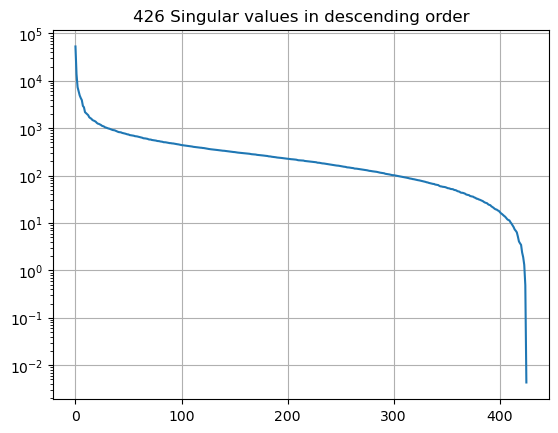

In [37]:
plt.plot(S3)
plt.grid()
plt.title('{0} Singular values in descending order'.format(len(S3)));
plt.yscale('log');

In [38]:
i

,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
0,138,133,141,120,142,136,126,118,123,122,...,75,55,53,79,66,63,86,55,62,61
1,93,111,65,81,84,42,80,67,73,69,...,42,83,53,48,76,59,69,114,58,63
2,25,61,75,50,47,76,59,51,79,69,...,113,102,103,112,90,87,109,96,90,96
3,103,110,123,148,145,145,114,132,139,125,...,40,67,72,73,73,63,67,86,76,77
4,65,55,93,43,52,139,68,83,80,69,...,73,66,62,57,60,63,55,51,48,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,63,175,133,136,116,122,158,147,134,106,...,129,53,63,175,171,141,91,131,116,117
422,118,142,136,156,189,125,115,119,132,185,...,46,96,104,135,108,94,121,200,211,142
423,128,111,82,100,138,138,106,145,104,65,...,110,82,69,156,123,71,106,123,158,86
424,46,59,49,69,52,55,41,112,126,21,...,75,129,114,114,109,97,124,106,88,66


In [39]:
U2, s2, Vh2 = la.svd(i)

In [40]:
s2

array([52890., 13824.,  7322.,  6014.,  4905.,  4323.,  3904.,  2953.,
        2759.,  2177., ...,     6.,     5.,     4.,     4.,     3.,
           2.,     2.,     1.,     0.,     0.], dtype=float32)

In [41]:
s44 = pd.DataFrame(s2)    
s44.to_csv("S9.csv")  

In [42]:
Vh2t = np.transpose(Vh2)       #    Vhi = np.linalg.inv(Vh)          U3, S3, Vh3 
Sd = np.diag(s2) 
np.set_printoptions(threshold=10, edgeitems=10, precision=0, suppress=True)
print(s2)

[52890. 13824.  7322.  6014.  4905.  4323.  3904.  2953.  2759.  2177. ...
     6.     5.     4.     4.     3.     2.     2.     1.     0.     0.]


In [43]:
U3.shape,  s2.shape, Vh3t.shape

NameError: name 'Vh3t' is not defined

In [ ]:
U2.shape,  s2.shape, Vh2.shape

In [ ]:
R = U3 @ s @ Vh3t
R

In [ ]:
s55 = pd.DataFrame(Vh2)    
s55.to_csv("S7.csv")  